In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [2]:
import pandas as pd
data = pd.read_csv("마킹시간_절단시간입력_세제곱.csv")
del data['Unnamed: 0']
data

,마킹시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,...,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이제곱,절단길이제곱,예측 절단시간
0,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,1240.40
1,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,2955.47
2,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,951.16
3,483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,4483.81
4,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,1655.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,3260.86
144403,827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,1587.96
144404,165,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,951.19
144405,345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,760.18


In [3]:
y = data['마킹시간(초)']
x = data.drop(['마킹시간(초)'],axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [4]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print("마킹길이, 절단길이 세제곱경우_마킹시간 학습정도(train data) :", train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print("마킹길이, 절단길이 세제곱경우_마킹시간 예측정도(test data) :", test_score)
gap = train_score - test_score
print("마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 :", gap)


마킹길이, 절단길이 세제곱경우_마킹시간 학습정도(train data) : 0.9661704240095081
마킹길이, 절단길이 세제곱경우_마킹시간 예측정도(test data) : 0.6793123360581395
마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 : 0.2868580879513687


In [6]:
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


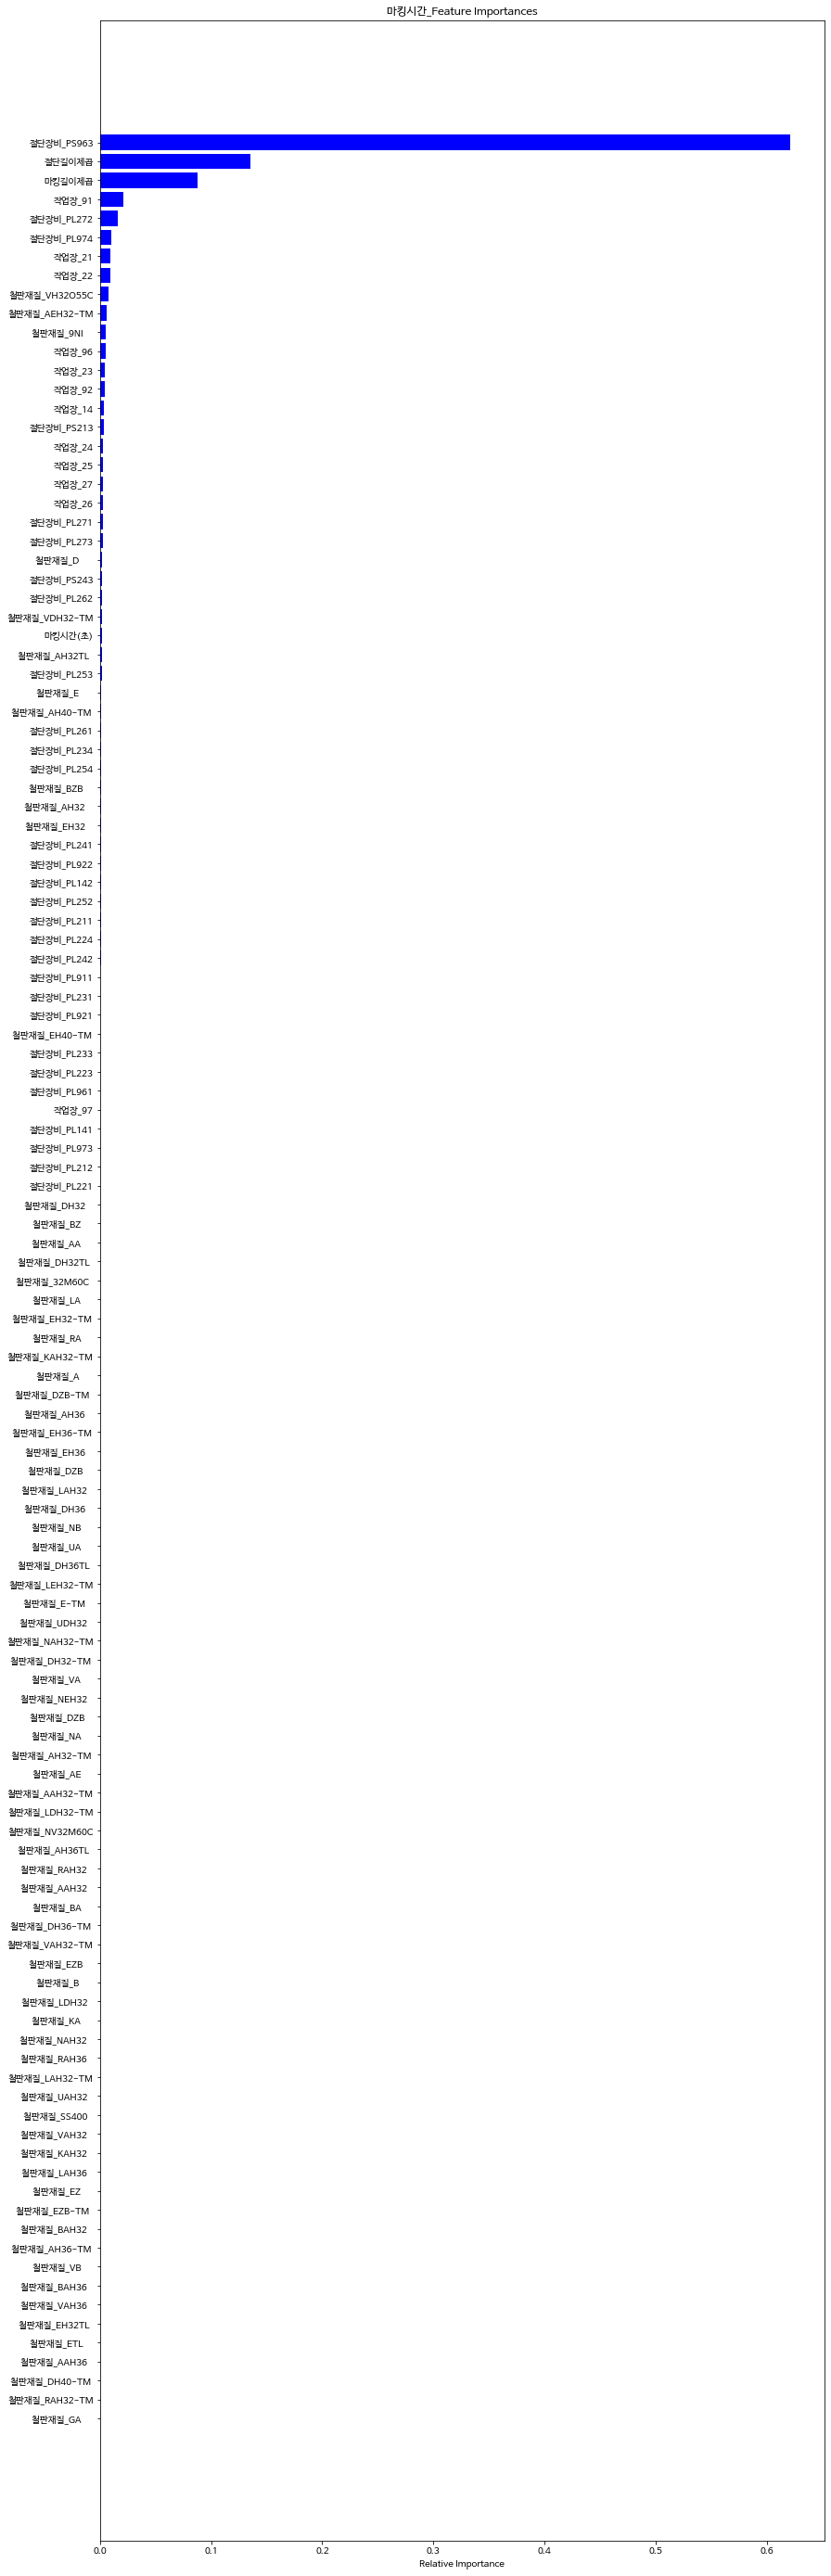

In [8]:
# 96,67.9
import matplotlib.pyplot as plt

features = data.columns.to_list()
importances = model.feature_importances_
indices = np.argsort(importances)

plt.rcParams["figure.figsize"] = (14,50)
plt.title('마킹시간_Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
#plt.yticks(rotation=45)
plt.show()

In [13]:
data_importance = data.iloc[:,[0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12,-13,-14,-15,-16,-17,-18,-19,-20,-21,-22,-23,-24,-25,-26,-27,-28,-29,-30,-31,-32,-33,-34,-35,-36,-37,-38,-39,-40,-41,-42,-43,-44]]
data_importance

,마킹시간(초),예측 절단시간,절단길이제곱,마킹길이제곱,절단장비_PS963,절단장비_PS243,절단장비_PS213,절단장비_PL974,절단장비_PL973,절단장비_PL961,절단장비_PL922,절단장비_PL921,절단장비_PL911,절단장비_PL273,절단장비_PL272,절단장비_PL271,절단장비_PL262,절단장비_PL261,절단장비_PL254,절단장비_PL253,절단장비_PL252,절단장비_PL242,절단장비_PL241,절단장비_PL234,절단장비_PL233,절단장비_PL231,절단장비_PL224,절단장비_PL223,절단장비_PL221,절단장비_PL212,절단장비_PL211,절단장비_PL142,절단장비_PL141,작업장_97,작업장_96,작업장_92,작업장_91,작업장_27,작업장_26,작업장_25,작업장_24,작업장_23,작업장_22,작업장_21,작업장_14
0,194,1240.40,10503.459,97336.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,324,2955.47,1397415.032,38958.219,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,241,951.16,37595.375,121287.375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,483,4483.81,5350192.749,433798.093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,331,1655.98,295408.296,294079.625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,464,3260.86,1906624.000,425259.008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
144403,827,1587.96,4251528.000,2732256.792,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
144404,165,951.19,24137.569,6331.625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
144405,345,760.18,16777.216,258474.853,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
y = data_importance['마킹시간(초)']
x = data_importance.drop(['마킹시간(초)'],axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
preddd = model.predict(x)

In [ ]:
data['예측 마킹시간'] = preddd
dataddd = data.iloc[:,-1]
dataddd

0         237.18
1         289.42
2         241.71
3         483.39
4         319.56
           ...  
144402    439.05
144403    516.49
144404    168.77
144405    349.42
144406    122.92
Name: 예측 마킹시간, Length: 144407, dtype: float64

In [ ]:
dataddd.to_csv('예측 마킹시간.csv')

In [ ]:
x_train

,철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,철판재질_EH36-TM,...,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이제곱,절단길이제곱,예측 절단시간
19386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1320139.673,101847.563,1014.02
90316,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,14886.936,72511.713,1216.09
106399,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2352637.000,128024.064,1224.31
37408,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,110592.000,314432.000,2227.49
97701,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,19683.000,4707843.776,4698.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,359425.431,135005.697,1467.86
97639,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,300763.000,97336.000,1625.90
95939,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,16581.375,13997.521,643.60
117952,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,284890.312,294079.625,1621.14


In [ ]:
y_train.shape

(101084,)

In [ ]:
pred2 = pred.reshape(-1,1)
pred2

array([[294.57],
       [594.45],
       [542.32],
       ...,
       [255.45],
       [159.67],
       [284.75]])

In [ ]:
y_test

107713    264
62274     517
139436    714
40339     502
88633     285
         ... 
14227     613
109290    620
135231    276
31440     140
137960    231
Name: 마킹시간(초), Length: 43323, dtype: int64

In [ ]:
model.score(x_test,y_test)

0.7473557474223593

In [ ]:
y = data['마킹시간(초)']
x = data.drop(['마킹시간(초)'],axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print("마킹길이, 절단길이 세제곱경우_마킹시간 학습정도(train data) :", train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print("마킹길이, 절단길이 세제곱경우_마킹시간 예측정도(test data) :", test_score)
gap = train_score - test_score
print("마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 :", gap)

마킹길이, 절단길이 세제곱경우_마킹시간 학습정도(train data) : 0.9667186868052249
마킹길이, 절단길이 세제곱경우_마킹시간 예측정도(test data) : 0.6743353670901899
마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 : 0.29238331971503495


In [ ]:
y = data['마킹시간(초)']
x = data.drop(['마킹시간(초)'],axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

* **절단시간 랜덤포레스트 하기로했으니까 절단시간 rf 튜닝하기**
* **마킹시간 랜덤포레스트 튜닝 및 라이트지비엠 그리드서치**
* **lgbm안된다 싶으면 스트레스 받지말고 랜덤포레스트 튜닝집중**

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb

params = {
    'num_iterations': [1000,2000,3000,4000,5000], 
    'learning_rate': [0.08,0.05,0.1,0.01], 
    'max_depth': [10,12,14,16,-1],  
    'booster' :['dart']
}


grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

print(abs(grid_search.best_score_))
print(grid_search.best_params_) # 최적찾구, 마킹시간에 입력변수로 넣기 

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


9514.293669995897
{'booster': 'dart', 'learning_rate': 0.05, 'max_depth': 10, 'num_iterations': 2000}


In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb

model = LGBMRegressor(n_estimators = 2000, boosting = 'dart', learning_rate = 0.05, max_depth = 10) 
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print(train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)

0.7883970384850105
0.6234618155273439
학습률 예측률 차이 : 0.1649352229576666
rmse:  100.08867949672444


In [ ]:
'''
LGBM_model = LGBMRegressor(n_estimators = 15000, boosting = 'dart', learning_rate = 0.01, max_depth = 10)
evals = [(x_test, y_test)]
LGBM_model.fit(x_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals, verbose = True)

train_score= model.score(x_train, y_train)
print(train_score)


pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)

0.7883970384850105
0.6234618155273439
학습률 예측률 차이 : 0.1649352229576666
rmse:  100.08867949672444
'''

* 0.3 랜덤포레스트 경우가 가장좋음 

In [ ]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print("마킹길이, 절단길이 세제곱경우_마킹시간 학습정도(train data) :", train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print("마킹길이, 절단길이 세제곱경우_마킹시간 예측정도(test data) :", test_score)
gap = train_score - test_score
print("마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 :", gap)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }


grid_search = GridSearchCV(RandomForestRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

print(abs(grid_search.best_score_))
print(grid_search.best_params_) 

9991.647434765104
{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
model = RandomForestRegressor(min_samples_split=8, min_samples_leaf = 8, n_estimators=100, max_depth=12) 
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print(train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)

0.7751448779601678
0.6436024103984093
학습률 예측률 차이 : 0.13154246756175858
rmse:  101.3477572688725


In [ ]:
# 마킹시간은 디폴트는 매우 과적합, 그리드서치는 과적합은 해결되지만 언더피팅..
model = RandomForestRegressor(min_samples_split=8, min_samples_leaf = 8, n_estimators=200, max_depth=12) 
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print(train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)

0.7755027350120105
0.6439499086296403
학습률 예측률 차이 : 0.1315528263823702
rmse:  101.25130168122044


In [ ]:
model = RandomForestRegressor(min_samples_split=2, min_samples_leaf = 1, n_estimators=300, max_depth=20) 
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print(train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)

0.9127559046897351
0.6749956989599053
학습률 예측률 차이 : 0.2377602057298298
rmse:  99.23073988662851


In [ ]:
model = RandomForestRegressor(min_samples_split=2, min_samples_leaf = 1, n_estimators=400, max_depth=40) 
model.fit(x_train, y_train)

train_score= model.score(x_train, y_train)
print(train_score)

pred =model.predict(x_test)

test_score= explained_variance_score(pred, y_test)
print(test_score)
gap = train_score - test_score
print("학습률 예측률 차이 :", gap)
RMSE = mean_squared_error(y_test, pred)**0.5
print("rmse: ", RMSE)

KeyboardInterrupt: ignored

In [ ]:
data

,마킹시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,...,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이제곱,절단길이제곱,예측 절단시간
0,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,1240.40
1,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,2955.47
2,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,951.16
3,483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,4483.81
4,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,1655.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,3260.86
144403,827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,1587.96
144404,165,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,951.19
144405,345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,760.18


In [ ]:
data.columns

Index(['마킹시간(초)', '철판재질_32M60C  ', '철판재질_9NI     ', '철판재질_A       ',
       '철판재질_AA      ', '철판재질_AAH32   ', '철판재질_AAH32-TM', '철판재질_AAH36   ',
       '철판재질_AE      ', '철판재질_AEH32-TM',
       ...
       '절단장비_PL922', '절단장비_PL961', '절단장비_PL973', '절단장비_PL974', '절단장비_PS213',
       '절단장비_PS243', '절단장비_PS963', '마킹길이제곱', '절단길이제곱', '예측 절단시간'],
      dtype='object', length=122)

In [ ]:
print(data['마킹시간(초)'].corr(data['마킹길이제곱']))
print(data['마킹시간(초)'].corr(data['절단길이제곱']))
print(data['마킹시간(초)'].corr(data['예측 절단시간']))

0.4593871251770811
0.21672431805203066
0.33719902399627705


In [ ]:
mark_length = data['마킹길이제곱'] ** 1.5
data['마킹길이세제곱*1.5'] = mark_length
cut_length = data['절단길이제곱'] ** 1.5
data['절단길이세제곱*1.5'] = mark_length
cut_time = data['예측 절단시간'] ** 1.5
data['예측 절단시간*1.5'] = cut_time

In [ ]:
data

,마킹시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,...,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이제곱,절단길이제곱,예측 절단시간,마킹길이세제곱*1.5,절단길이세제곱*1.5,예측 절단시간*1.5
0,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,1240.40,3.036758e+07,3.036758e+07,43686.035701
1,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,2955.47,7.689510e+06,7.689510e+06,160671.864334
2,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,951.16,4.223995e+07,4.223995e+07,29334.613284
3,483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,4483.81,2.857140e+08,2.857140e+08,300241.555791
4,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,1655.98,1.594768e+08,1.594768e+08,67388.009897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,3260.86,2.773194e+08,2.773194e+08,186207.954830
144403,827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,1587.96,4.516295e+09,4.516295e+09,63278.960724
144404,165,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,951.19,5.038170e+05,5.038170e+05,29336.001135
144405,345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,760.18,1.314097e+08,1.314097e+08,20959.197930


In [ ]:
print(data['마킹시간(초)'].corr(data['마킹길이세제곱*1.5']))
print(data['마킹시간(초)'].corr(data['절단길이세제곱*1.5']))
print(data['마킹시간(초)'].corr(data['예측 절단시간*1.5']))

0.25990691857226805
0.25990691857226805
0.3249396107180632


* 절단길이만 세제곱*1.5 채택

In [ ]:
mark_length80 = data['마킹길이제곱'] ** 0.8
data['마킹길이세제곱*0.8'] = mark_length80
cut_time80 = data['예측 절단시간'] ** 0.8
data['예측 절단시간*0.8'] = cut_time80

In [ ]:
print(data['마킹시간(초)'].corr(data['마킹길이세제곱*0.8']))
print(data['마킹시간(초)'].corr(data['예측 절단시간*0.8']))

0.5394327396433424
0.3413543531139636


In [ ]:
mark_length65 = data['마킹길이제곱'] ** 0.65
data['마킹길이세제곱*0.65'] = mark_length65
cut_time65 = data['예측 절단시간'] ** 0.65
data['예측 절단시간*0.65'] = cut_time65
print(data['마킹시간(초)'].corr(data['마킹길이세제곱*0.65']))
print(data['마킹시간(초)'].corr(data['예측 절단시간*0.65']))

0.5993046923781761
0.3440765827942086


In [ ]:
mark_length50 = data['마킹길이제곱'] ** 0.50
data['마킹길이세제곱*0.50'] = mark_length50
cut_time50 = data['예측 절단시간'] ** 0.50
data['예측 절단시간*0.50'] = cut_time50
print(data['마킹시간(초)'].corr(data['마킹길이세제곱*0.50']))
print(data['마킹시간(초)'].corr(data['예측 절단시간*0.50']))

0.6562155328892013
0.3464009506031564


In [ ]:
mark_length30 = data['마킹길이제곱'] ** 0.30
data['마킹길이세제곱*0.30'] = mark_length30
cut_time30 = data['예측 절단시간'] ** 0.30
data['예측 절단시간*0.30'] = cut_time30
print(data['마킹시간(초)'].corr(data['마킹길이세제곱*0.30']))
print(data['마킹시간(초)'].corr(data['예측 절단시간*0.30']))

0.7168121012187617
0.34878976938742473


In [ ]:
mark_length15 = data['마킹길이제곱'] ** 0.15
data['마킹길이세제곱*0.15'] = mark_length15
cut_time15 = data['예측 절단시간'] ** 0.15
data['예측 절단시간*0.15'] = cut_time15
print(data['마킹시간(초)'].corr(data['마킹길이세제곱*0.15']))
print(data['마킹시간(초)'].corr(data['예측 절단시간*0.15']))

0.7385170870169308
0.34998387950271004


In [ ]:
import pandas as pd
data = pd.read_csv("마킹시간_절단시간입력_세제곱.csv")
del data['Unnamed: 0']
data

,마킹시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,...,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이제곱,절단길이제곱,예측 절단시간
0,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,1240.40
1,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,2955.47
2,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,951.16
3,483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,4483.81
4,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,1655.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,3260.86
144403,827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,1587.96
144404,165,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,951.19
144405,345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,760.18


In [ ]:
cut_length = data['절단길이제곱'] ** 1.5
data['절단길이세제곱*1.5'] = mark_length
data

,마킹시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,...,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이제곱,절단길이제곱,예측 절단시간,절단길이세제곱*1.5
0,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,1240.40,9786.306108
1,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,2955.47,4704.129573
2,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,951.16,11669.506156
3,483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,4483.81,32346.709691
4,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,1655.98,23701.288065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,3260.86,31836.316781
144403,827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,1587.96,140999.382726
144404,165,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,951.19,1099.542823
144405,345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,760.18,21376.403451


In [ ]:
del data['절단길이제곱']

mark_length80 = data['마킹길이제곱'] ** 0.8
data['마킹길이세제곱*0.8'] = mark_length80
cut_time80 = data['예측 절단시간'] ** 0.8
data['예측 절단시간*0.8'] = cut_time80

mark_length65 = data['마킹길이제곱'] ** 0.65
data['마킹길이세제곱*0.65'] = mark_length65
cut_time65 = data['예측 절단시간'] ** 0.65
data['예측 절단시간*0.65'] = cut_time65

mark_length50 = data['마킹길이제곱'] ** 0.50
data['마킹길이세제곱*0.50'] = mark_length50
cut_time50 = data['예측 절단시간'] ** 0.50
data['예측 절단시간*0.50'] = cut_time50

In [ ]:
data

,마킹시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,...,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이제곱,예측 절단시간,절단길이세제곱*1.5,마킹길이세제곱*0.8,예측 절단시간*0.8,마킹길이세제곱*0.65,예측 절단시간*0.65,마킹길이세제곱*0.50,예측 절단시간*0.50
0,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,1240.40,9786.306108,9786.306108,298.434760,1747.341420,102.521545,311.987179,35.219313
1,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,2955.47,4704.129573,4704.129573,597.724757,963.583626,180.263277,197.378365,54.364235
2,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,951.16,11669.506156,11669.506156,241.325304,2015.951771,86.270999,348.263370,30.840882
3,483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,4483.81,32346.709691,32346.709691,834.291389,4615.693529,236.358204,658.633504,66.961257
4,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,1655.98,23701.288065,23701.288065,376.048681,3585.107713,123.704588,542.291089,40.693734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,3260.86,31836.316781,31836.316781,646.644701,4556.430908,192.161287,652.118860,57.103940
144403,827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,1587.96,140999.382726,140999.382726,363.639998,15266.482501,120.377609,1652.953959,39.849216
144404,165,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,951.19,1099.542823,1099.542823,241.331394,295.790942,86.272767,79.571509,30.841368
144405,345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,760.18,21376.403451,21376.403451,201.712658,3296.642802,74.575416,508.404222,27.571362


In [ ]:
del data['마킹길이제곱']

In [ ]:
del data['예측 절단시간']
data

,마킹시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,...,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,절단길이세제곱*1.5,마킹길이세제곱*0.8,예측 절단시간*0.8,마킹길이세제곱*0.65,예측 절단시간*0.65,마킹길이세제곱*0.50,예측 절단시간*0.50
0,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9786.306108,9786.306108,298.434760,1747.341420,102.521545,311.987179,35.219313
1,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4704.129573,4704.129573,597.724757,963.583626,180.263277,197.378365,54.364235
2,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11669.506156,11669.506156,241.325304,2015.951771,86.270999,348.263370,30.840882
3,483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32346.709691,32346.709691,834.291389,4615.693529,236.358204,658.633504,66.961257
4,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23701.288065,23701.288065,376.048681,3585.107713,123.704588,542.291089,40.693734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31836.316781,31836.316781,646.644701,4556.430908,192.161287,652.118860,57.103940
144403,827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140999.382726,140999.382726,363.639998,15266.482501,120.377609,1652.953959,39.849216
144404,165,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1099.542823,1099.542823,241.331394,295.790942,86.272767,79.571509,30.841368
144405,345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,21376.403451,21376.403451,201.712658,3296.642802,74.575416,508.404222,27.571362


In [ ]:
data.columns

Index(['마킹시간(초)', '철판재질_32M60C  ', '철판재질_9NI     ', '철판재질_A       ',
       '철판재질_AA      ', '철판재질_AAH32   ', '철판재질_AAH32-TM', '철판재질_AAH36   ',
       '철판재질_AE      ', '철판재질_AEH32-TM',
       ...
       '절단장비_PS213', '절단장비_PS243', '절단장비_PS963', '절단길이세제곱*1.5', '마킹길이세제곱*0.8',
       '예측 절단시간*0.8', '마킹길이세제곱*0.65', '예측 절단시간*0.65', '마킹길이세제곱*0.50',
       '예측 절단시간*0.50'],
      dtype='object', length=126)

In [ ]:
y8 = data['마킹시간(초)']
x8 = data.drop(['마킹시간(초)','마킹길이세제곱*0.65', '예측 절단시간*0.65', '마킹길이세제곱*0.50',
       '예측 절단시간*0.50'],axis=1, inplace=False)
x_train8, x_test8, y_train8, y_test8 = train_test_split(x8, y8, test_size=0.3, random_state=0)

y65 = data['마킹시간(초)']
x65 = data.drop(['마킹시간(초)','마킹길이세제곱*0.8', '예측 절단시간*0.8', '마킹길이세제곱*0.50',
       '예측 절단시간*0.50'],axis=1, inplace=False)
x_train65, x_test65, y_train65, y_test65 = train_test_split(x65, y65, test_size=0.3, random_state=0)

y50 = data['마킹시간(초)']
x50 = data.drop(['마킹시간(초)','마킹길이세제곱*0.8', '예측 절단시간*0.8', '마킹길이세제곱*0.65',
       '예측 절단시간*0.65'],axis=1, inplace=False)
x_train50, x_test50, y_train50, y_test50 = train_test_split(x50, y50, test_size=0.3, random_state=0)


* 마킹길이, 절단길이 세제곱경우_마킹시간 학습정도(train data) : 0.9661817292809739
* 마킹길이, 절단길이 세제곱경우_마킹시간 예측정도(test data) : 0.6790242157620441
* 마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 : 0.2871575135189298

In [ ]:
model = RandomForestRegressor()
model.fit(x_train8, y_train8)

train_score= model.score(x_train8, y_train8)
print("절단길이3*1.5승, 마킹길이3*0.8승, 예측 절단시간*0.8승의 학습정도 :", train_score)

pred =model.predict(x_test8)

test_score= explained_variance_score(pred, y_test8)
print("절단길이3*1.5승, 마킹길이3*0.8승, 예측 절단시간*0.8승의 예측정도 :", test_score)
gap = train_score - test_score
print("마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 :", gap)

절단길이3*1.5승, 마킹길이3*0.8승, 예측 절단시간*0.8승의 학습정도 : 0.9626280928799982
절단길이3*1.5승, 마킹길이3*0.8승, 예측 절단시간*0.8승의 예측정도 : 0.6520372161452932
마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 : 0.310590876734705


In [ ]:
model = RandomForestRegressor()
model.fit(x_train65, y_train65)

train_score= model.score(x_train65, y_train65)
print("절단길이3*1.5승, 마킹길이3*0.65승, 예측 절단시간*0.65승의 학습정도 :", train_score)

pred =model.predict(x_test65)

test_score= explained_variance_score(pred, y_test65)
print("절단길이3*1.5승, 마킹길이3*0.65승, 예측 절단시간*0.65승의 예측정도 :", test_score)
gap = train_score - test_score
print("마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 :", gap)

절단길이3*1.5승, 마킹길이3*0.65승, 예측 절단시간*0.65승의 학습정도 : 0.9627869475056235
절단길이3*1.5승, 마킹길이3*0.65승, 예측 절단시간*0.65승의 예측정도 : 0.651474087136013
마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 : 0.3113128603696106


In [ ]:
model = RandomForestRegressor()
model.fit(x_train50, y_train50)

train_score= model.score(x_train50, y_train50)
print("절단길이3*1.5승, 마킹길이3*0.50승, 예측 절단시간*0.50승의 학습정도 :", train_score)

pred =model.predict(x_test50)

test_score= explained_variance_score(pred, y_test50)
print("절단길이3*1.5승, 마킹길이3*0.50승, 예측 절단시간*0.50승의 예측정도 :", test_score)
gap = train_score - test_score
print("마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 :", gap)

절단길이3*1.5승, 마킹길이3*0.50승, 예측 절단시간*0.50승의 학습정도 : 0.9628091899224227
절단길이3*1.5승, 마킹길이3*0.50승, 예측 절단시간*0.50승의 예측정도 : 0.6519616875360267
마킹길이, 절단길이 세제곱경우_학습률 예측률 차이 : 0.310847502386396


In [ ]:
import pandas as pd
mark_data = pd.read_csv("예측 마킹시간.csv")
cut_data = pd.read_csv("cut_predtion_rf.csv")

In [ ]:
mark_data

,Unnamed: 0,예측 마킹시간
0,0,237.18
1,1,289.42
2,2,241.71
3,3,483.39
4,4,319.56
...,...,...
144402,144402,439.05
144403,144403,516.49
144404,144404,168.77
144405,144405,349.42


In [ ]:
cut_data

,Unnamed: 0,예측 절단시간
0,0,1240.40
1,1,2955.47
2,2,951.16
3,3,4483.81
4,4,1655.98
...,...,...
144402,144402,3260.86
144403,144403,1587.96
144404,144404,951.19
144405,144405,760.18


In [ ]:
work_data = mark_data['예측 마킹시간'] + cut_data['예측 절단시간']
work_data

0         1477.58
1         3244.89
2         1192.87
3         4967.20
4         1975.54
           ...   
144402    3699.91
144403    2104.45
144404    1119.96
144405    1109.60
144406    1061.05
Length: 144407, dtype: float64

In [ ]:
work_data.to_csv("예측 작업시간.csv")

In [ ]:
data = pd.read_csv("마킹시간_절단시간입력_세제곱.csv")
data

,Unnamed: 0,마킹시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,...,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이제곱,절단길이제곱,예측 절단시간
0,0,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,1240.40
1,1,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,2955.47
2,2,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,951.16
3,3,483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,4483.81
4,4,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,1655.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,144402,464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,3260.86
144403,144403,827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,1587.96
144404,144404,165,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,951.19
144405,144405,345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,760.18


In [ ]:
data.columns

Index(['Unnamed: 0', '마킹시간(초)', '철판재질_32M60C  ', '철판재질_9NI     ',
       '철판재질_A       ', '철판재질_AA      ', '철판재질_AAH32   ', '철판재질_AAH32-TM',
       '철판재질_AAH36   ', '철판재질_AE      ',
       ...
       '절단장비_PL922', '절단장비_PL961', '절단장비_PL973', '절단장비_PL974', '절단장비_PS213',
       '절단장비_PS243', '절단장비_PS963', '마킹길이제곱', '절단길이제곱', '예측 절단시간'],
      dtype='object', length=123)

In [ ]:
del data['Unnamed: 0']
del data['마킹시간(초)']
data['예측 마킹시간'] = mark_data['예측 마킹시간']
data['예측 작업시간'] = mark_data['예측 마킹시간'] + cut_data['예측 절단시간']
data

,철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,철판재질_EH36-TM,...,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이제곱,절단길이제곱,예측 절단시간,예측 마킹시간,예측 작업시간
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,1240.40,237.18,1477.58
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,2955.47,289.42,3244.89
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,951.16,241.71,1192.87
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,4483.81,483.39,4967.20
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,1655.98,319.56,1975.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,3260.86,439.05,3699.91
144403,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,1587.96,516.49,2104.45
144404,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,951.19,168.77,1119.96
144405,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,760.18,349.42,1109.60


In [ ]:
data.rename(columns = {'마킹길이제곱' : '마킹길이 세제곱', '절단길이제곱' : '절단길이 세제곱'}, inplace=True)
data

,철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,철판재질_EH36-TM,...,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이 세제곱,절단길이 세제곱,예측 절단시간,예측 마킹시간,예측 작업시간
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,1240.40,237.18,1477.58
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,2955.47,289.42,3244.89
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,951.16,241.71,1192.87
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,4483.81,483.39,4967.20
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,1655.98,319.56,1975.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,3260.86,439.05,3699.91
144403,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,1587.96,516.49,2104.45
144404,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,951.19,168.77,1119.96
144405,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,760.18,349.42,1109.60


In [ ]:
del data['예측 절단시간']
del data['예측 작업시간']
data

,철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,철판재질_EH36-TM,...,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이 세제곱,절단길이 세제곱,예측 마킹시간
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,237.18
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,289.42
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,241.71
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,483.39
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,319.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,439.05
144403,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,516.49
144404,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,168.77
144405,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,349.42


In [ ]:
data['예측 절단시간'] = cut_data['예측 절단시간']
data

,철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,철판재질_EH36-TM,...,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이 세제곱,절단길이 세제곱,예측 마킹시간,예측 작업시간,예측 절단시간
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,237.18,1240.40,1240.40
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,289.42,2955.47,2955.47
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,241.71,951.16,951.16
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,483.39,4483.81,4483.81
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,319.56,1655.98,1655.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,439.05,3260.86,3260.86
144403,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,516.49,1587.96,1587.96
144404,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,168.77,951.19,951.19
144405,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,349.42,760.18,760.18


In [ ]:
del data['예측 작업시간']
data

,철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,철판재질_EH36-TM,...,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,마킹길이 세제곱,절단길이 세제곱,예측 마킹시간,예측 절단시간
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97336.000,10503.459,237.18,1240.40
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38958.219,1397415.032,289.42,2955.47
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121287.375,37595.375,241.71,951.16
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,433798.093,5350192.749,483.39,4483.81
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,294079.625,295408.296,319.56,1655.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144402,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425259.008,1906624.000,439.05,3260.86
144403,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732256.792,4251528.000,516.49,1587.96
144404,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6331.625,24137.569,168.77,951.19
144405,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,258474.853,16777.216,349.42,760.18


In [ ]:
data.to_csv('마킹시간 데이터프레임.csv')

In [ ]:
Data = pd.read_csv("cutting.csv")
Data

,Unnamed: 0,절단 길이 (m),절단갯수,절단시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,...,작업장_21,작업장_22,작업장_23,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963
0,0,21.9,1,827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,111.8,46,2906,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,33.5,2,1003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,174.9,35,4412,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,66.6,7,1601,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32888,35453,37.5,2,932,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32889,35454,37.7,2,2168,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32890,35455,37.7,2,2424,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32891,35456,17.6,28,512,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
del Data['Unnamed: 0']
Data['예측 절단시간'] =  cut_data['예측 절단시간']
Data

,절단 길이 (m),절단갯수,절단시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,...,작업장_22,작업장_23,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,예측 절단시간
0,21.9,1,827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1240.40
1,111.8,46,2906,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2955.47
2,33.5,2,1003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,951.16
3,174.9,35,4412,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4483.81
4,66.6,7,1601,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1655.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32888,37.5,2,932,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1464.48
32889,37.7,2,2168,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1948.04
32890,37.7,2,2424,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1948.04
32891,17.6,28,512,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.65


In [ ]:
import pandas as pd
data_cut = pd.read_csv("절단시간 데이터프레임.csv")
data_cut

,Unnamed: 0,절단 길이 (m),절단갯수,절단시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,...,작업장_22,작업장_23,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,예측 절단시간
0,0,21.9,1,827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1240.40
1,1,111.8,46,2906,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2955.47
2,2,33.5,2,1003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,951.16
3,3,174.9,35,4412,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4483.81
4,4,66.6,7,1601,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1655.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32888,32888,37.5,2,932,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1464.48
32889,32889,37.7,2,2168,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1948.04
32890,32890,37.7,2,2424,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1948.04
32891,32891,17.6,28,512,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.65
